In [1]:
%matplotlib inline

import numpy as np
import pylab as plt
from scipy.ndimage import imread
import ccgpack as ccg
import pywt 

def wavelet(data, wlf, threshold):
    wavelet = pywt.Wavelet(wlf)
    levels  = pywt.dwt_max_level(data.shape[0], wavelet)
    WaveletCoeffs = pywt.wavedec2(data, wavelet, level=levels)
    NewWaveletCoeffs = map (lambda x: pywt.threshold(x,threshold,'less'),WaveletCoeffs)
    data = pywt.waverec2( NewWaveletCoeffs, wavelet)
    return data

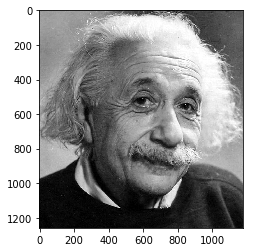

In [2]:
img = imread('../images/einstein.jpg')
plt.imshow(img,'gray')

In [3]:
img = img.astype(float)
img /= img.max()

In [4]:
cur = ccg.curvelet(img,3)

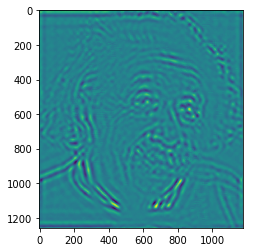

In [5]:
plt.imshow(cur)

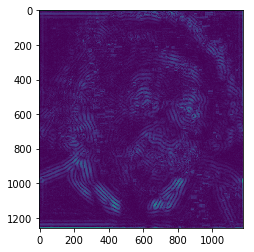

In [6]:
l2 = ccg.filters(cur)
plt.imshow(l2)

In [8]:
# m = np.random.normal(0,1,(100,100))
stats = ccg.stat_describe(l2)
print stats

[ 0.18111273  0.17560556  1.51478434]


In [13]:
def extractor(m,c,filt='sch'):  
    mp = ccg.curvelet(m,c)
    mp = ccg.filters(mp,edd_method=filt)
    return ccg.stat_describe(mp)[1]

extractor(img,3)

0.17560556285634921

/home/gf/packages/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


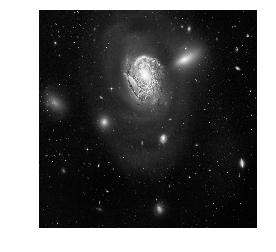

In [8]:
img = imread('../images/coma_cluster.jpg')
img = np.mean(img,axis=-1)
plt.imshow(img,'gray')
plt.axis('off')
plt.savefig('coma.jpg',bbox_inches='tight',dpi=150)

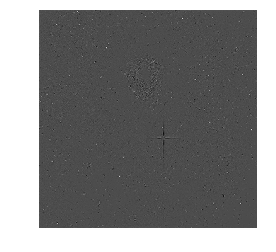

In [10]:
for i in range(7,8):
    cur = ccg.curvelet(img,i)
    plt.imshow(cur,'gray')
    plt.axis('off')
    plt.savefig('coma_'+str(i)+'.jpg'
                ,bbox_inches='tight',dpi=150)